In [127]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('language.csv')

**Extracting Data from language.csv**

In [131]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [140]:
data.isnull().sum()

Text        0
language    0
dtype: int64

**Data Cleaning: checking whether there is any null value**

In [142]:
data['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

**Each Language has 1000 sets of sentences**

In [144]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


**22 languages each having 1000 sets of languages=22000 data**

In [146]:
x=np.array(data['Text'])
y=np.array(data['language'])

**Converting text and language to array**

In [148]:
print(x)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [150]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


In [152]:
cv=CountVectorizer()
x=cv.fit_transform(x)

**Convert text data in the array into numerical format using CountVectorizer**

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Split data into training and testing sets (70% train, 30% test)**

In [154]:
model=MultinomialNB()

In [158]:
model.fit(x_train,y_train)

MultinomialNB()

**Using Multinomial Naive Bayes from sklearn.naive_bayes to find the probability of pattern of word counts for each known language and predicts the one with the highest probability.**

In [160]:
model.score(x_test,y_test)

0.9528787878787879

**Model is giving around 95% accuracy and 5% error**

In [188]:
user=input("Enter text: ")
data=cv.transform([user]).toarray()
output=model.predict(data)
print("Language detected to be: ",output)

Enter text:  میں انیش ہوں


Language detected to be:  ['Urdu']


**Take user input and detect the language**

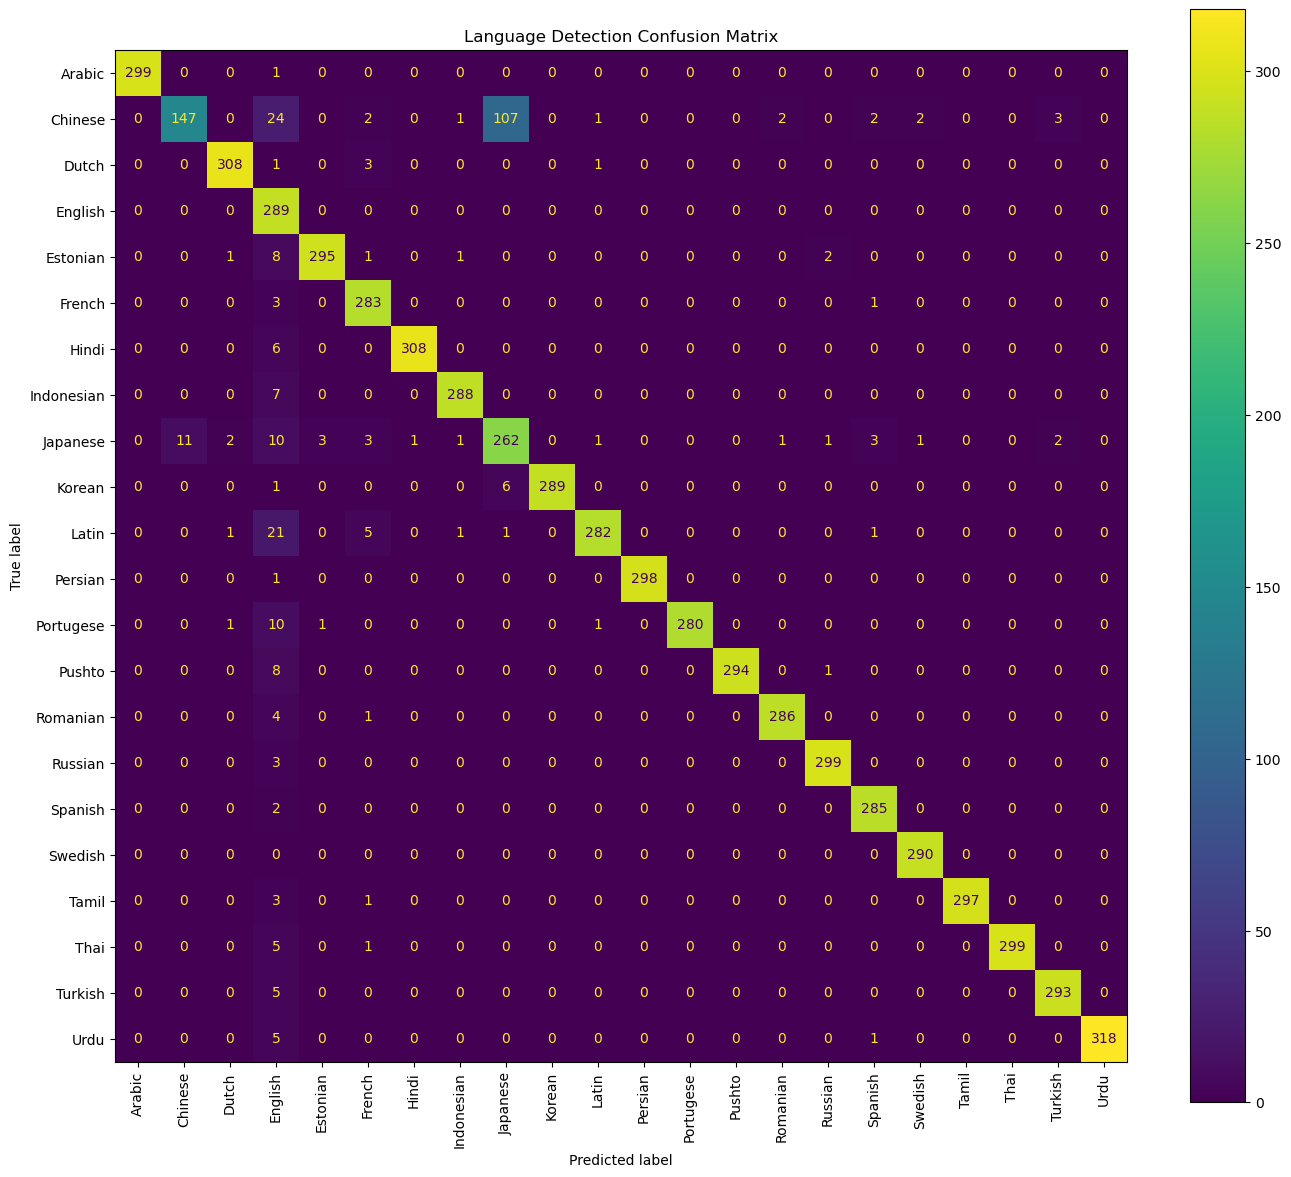

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test,
    xticks_rotation=90,       
    cmap='viridis'           
)
disp.figure_.set_size_inches(14, 12) 
plt.title("Language Detection Confusion Matrix")
plt.tight_layout()
plt.show()


- **Confusion Matrix : A confusion matrix is a table used to evaluate the performance of a classification model. It tells us how many predictions our model got right and wrong.**

- **Urdu is the Most Accurately Predicted Language according to the confusion matrix**

# SUMMARY

- **Goal**: Detect the language of a given text using machine learning.

- **Model Used**: Multinomial Naive Bayes – best suited for text classification with word count features.

- **Text Preprocessing**: Used CountVectorizer to convert sentences into word frequency vectors.

- **Train-Test Split**: 70% training and 30% testing data (train_test_split).

- **Accuracy Achieved**: ~95.3%

- **Evaluation Tool**: Confusion matrix for per-language prediction performance.

**Insights:**
- Common Confusions:
  - Chinese → Romanian (high misclassification)
  - Latin → Japanese, Portuguese, Romanian
- Strong Predictions: English, French, Spanish, Urdu show almost perfect classification.